In [213]:
# import libraries
import pandas as pd
import numpy as np
import sklearn
import nltk
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [205]:
def clean_data(train):
    # clean data
    train['ingredients_clean_string'] = [' , '.join(z).strip() for z in train['ingredients']]
    
    # lemmatize ingredients  
    train['ingredients_string'] = [' '.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', ' ', line)) for line in lists]).strip() for lists in train['ingredients']]       
    

In [206]:
def preprocessing():
    with open('../data/train.json') as json_file:
        data = pd.read_json(json_file, orient='columns')

    # call function to clean data
    clean_data(data)
    
    return data

In [207]:
# run all functions
data = preprocessing()
# train.ingredients_string
data.head()
# train_predictor = vectorize(train)
# print(train_predictor)

,cuisine,id,ingredients,ingredients_clean_string,ingredients_string
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...","romaine lettuce , black olives , grape tomatoe...",romaine lettuce black olives grape tomatoes ga...
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...","plain flour , ground pepper , salt , tomatoes ...",plain flour ground pepper salt tomato ground b...
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...","eggs , pepper , salt , mayonaise , cooking oil...",egg pepper salt mayonaise cooking oil green ch...
3,indian,22213,"[water, vegetable oil, wheat, salt]","water , vegetable oil , wheat , salt",water vegetable oil wheat salt
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...","black pepper , shallots , cornflour , cayenne ...",black pepper shallot cornflour cayenne pepper ...


In [216]:
my_stop_words = text.ENGLISH_STOP_WORDS.union(["skinless","boneless","black","shredded","grated","cheese","yolks","purpose","fat","free","baking","toasted","seeds","dried","low","sodium","fresh","zest","juice","italian","crushed","unsalted","sauce","red","green","bell","ground","breasts","chopped","broth","condensed","extract","heavy","whites","large","dry","masala","seed","seasoning","chile","chilies","chiles","white","cloves","long","grain","extra","virgin","sweetened","brown","skim","thai","leaves","whipping","powdered","kosher","purple","soup","olive","powder","lasagna"])

tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = my_stop_words

)
tfidf.fit(data.ingredients_clean_string)
text = tfidf.transform(data.ingredients_clean_string)

In [217]:
# clusters = MiniBatchKMeans(n_clusters=len(data.cuisine.unique()), init_size=1024, random_state=20).fit_predict(text)
clusters = KMeans(n_clusters=len(data.cuisine.unique())).fit_predict(text)

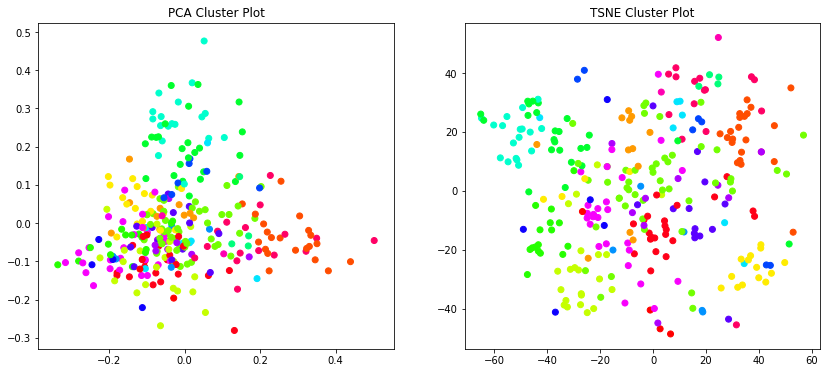

In [218]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)

In [211]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()

    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 10)


Cluster 0
chicken,tomatoes,oil,onion,salt,chili,garlic,pepper,oregano,cumin

Cluster 1
soda,yeast,water,buttermilk,sugar,salt,milk,butter,eggs,flour

Cluster 2
loin,water,shoulder,soy,oil,onions,garlic,salt,pepper,pork

Cluster 3
mushrooms,wine,oil,chicken,salt,garlic,parsley,butter,pepper,parmesan

Cluster 4
wine,butter,leaf,garlic,flat,salt,oil,pepper,parsley,lemon

Cluster 5
cider,garlic,balsamic,salt,oil,dijon,wine,pepper,mustard,vinegar

Cluster 6
salt,orange,oil,rice,coconut,fish,milk,lime,water,sugar

Cluster 7
tomatoes,lemon,onions,salt,garlic,oil,pepper,chicken,halves,breast

Cluster 8
cinnamon,chocolate,milk,eggs,flour,egg,cream,butter,vanilla,sugar

Cluster 9
butter,chicken,onion,tomatoes,thyme,onions,oil,garlic,salt,pepper

Cluster 10
taco,chicken,jack,beans,corn,cheddar,salsa,sour,cream,tortillas

Cluster 11
garlic,curry,oil,salt,chili,turmeric,garam,ginger,cumin,coriander

Cluster 12
sausage,diced,garlic,thyme,tomatoes,onions,bay,chicken,pepper,celery

Cluster 13
pepper,